In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('vader_lexicon')

df = pd.read_csv("../data/cleaned_reviews.csv")
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_id,user_id,product_id,review_title,review_content,cleaned_review,cleaned_length
0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36
1,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,113
2,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",quite durable sturdy good nice productworking ...,10
3,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good productlong wirecharges goodnicei bought ...,40
4,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",bought instead original apple work fast apple ...,227


In [3]:
aspects = {
    "quality": ["quality", "durable", "sturdy", "solid", "build", "material", "construction"],
    "price": ["price", "expensive", "cheap", "value", "worth", "cost", "affordable"],
    "performance": ["work", "function", "perform", "fast", "speed", "efficient"],
    "design": ["design", "look", "color", "style", "appearance", "aesthetic"],
    "ease_of_use": ["easy", "simple", "difficult", "complicated", "user", "friendly", "intuitive"],
    "shipping": ["shipping", "delivery", "arrived", "package", "damaged", "late", "fast"],
    "customer_service": ["service", "support", "return", "refund", "warranty", "help"]
}

In [4]:
sia = SentimentIntensityAnalyzer()

def get_aspect_sentiment(text, aspects):
    aspect_sentiments = {}
    for aspect, keywords in aspects.items():
        if any(word in text.lower() for word in keywords):
            score = sia.polarity_scores(text)
            aspect_sentiments[aspect] = score['compound']
    return aspect_sentiments

df["aspect_sentiments"] = df["cleaned_review"].apply(lambda x: get_aspect_sentiment(x, aspects))

In [5]:
aspect_df = df["aspect_sentiments"].apply(pd.Series)
aspect_df.head()


,quality,price,performance,design,shipping,customer_service,ease_of_use
0,0.9419,0.9419,0.9419,0.9419,0.9419,NaN,NaN
1,0.9750,0.9750,0.9750,NaN,0.9750,0.9750,NaN
2,0.8300,NaN,0.8300,NaN,NaN,NaN,NaN
3,NaN,0.9393,0.9393,NaN,0.9393,0.9393,NaN
4,0.9926,0.9926,0.9926,NaN,0.9926,0.9926,NaN


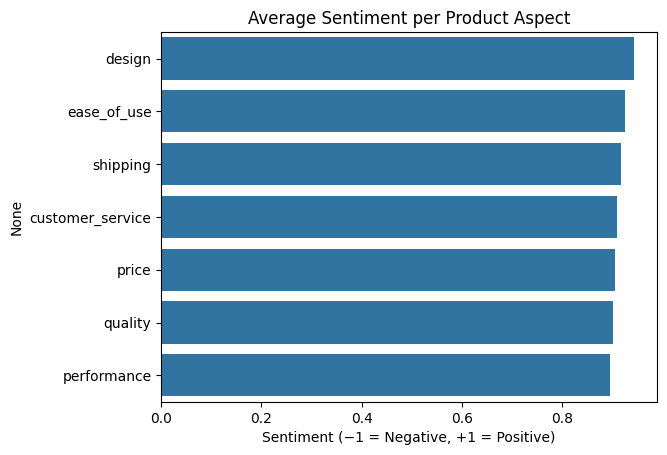

In [6]:
mean_sentiments = aspect_df.mean().sort_values(ascending=False)
sns.barplot(x=mean_sentiments.values, y=mean_sentiments.index)
plt.title("Average Sentiment per Product Aspect")
plt.xlabel("Sentiment (−1 = Negative, +1 = Positive)")
plt.savefig('../results/visualization/avg_sentiment_per_product_aspect.png')
plt.show()


In [11]:
df.to_csv("aspect_sentiment_results.csv", index=False)
